<BarContainer object of 12 artists>

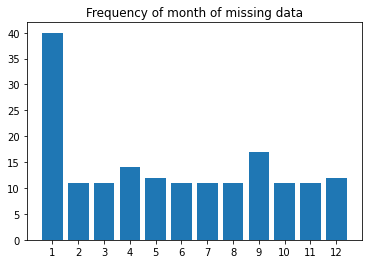

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IRLTLT01USM156N = pd.read_csv('../data/IRLTLT01USM156N.csv') # since 1960
TB3MS = pd.read_csv('../data/TB3MS.csv') # since 1934
GS10 = pd.read_csv('../data/GS10.csv') # since 1953
DGS3MO = pd.read_csv('../data/DGS3MO.csv', na_values='.') # since 1981

df = pd.merge(IRLTLT01USM156N[IRLTLT01USM156N['DATE'] > '1982'], TB3MS, how='left', on='DATE')
df = df.merge(GS10, how='left', on='DATE')
df = df.merge(DGS3MO, how='left', on='DATE')

df['ratio'] = df['DGS3MO'] / df['TB3MS']

missing_months = [ _[-5:-3] for _ in df[df['DGS3MO'].isnull()]['DATE']]
labels = range(1, 13)
ticks = range(1, 13)
plt.xticks(ticks, labels)
plt.title('Frequency of month of missing data')
plt.bar(range(1, 13), [missing_months.count(_) for _ in np.unique(missing_months)])

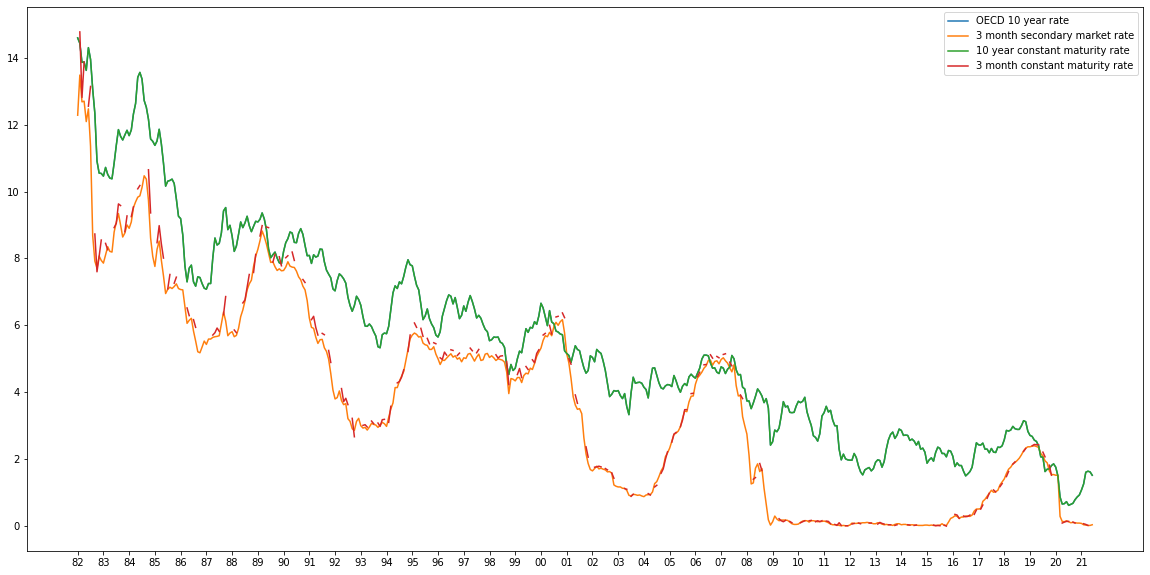

In [118]:
plt.figure(figsize=(20,10))
labels = [_[2:4] for _ in df['DATE'] if _[5:-3] == '01']
ticks = [k for k, v in enumerate(df['DATE']) if k%12 == 0]
plt.xticks(ticks, labels)
plt.plot(df['DATE'], df['IRLTLT01USM156N'], label='OECD 10 year rate')
plt.plot(df['DATE'], df['TB3MS'], label='3 month secondary market rate')
plt.plot(df['DATE'], df['GS10'], label='10 year constant maturity rate')
plt.plot(df['DATE'], df['DGS3MO'], label='3 month constant maturity rate')
plt.legend()

Text(0.5, 1.0, '3 month T-bill yield ratio: constant maturity vs. secondary market')

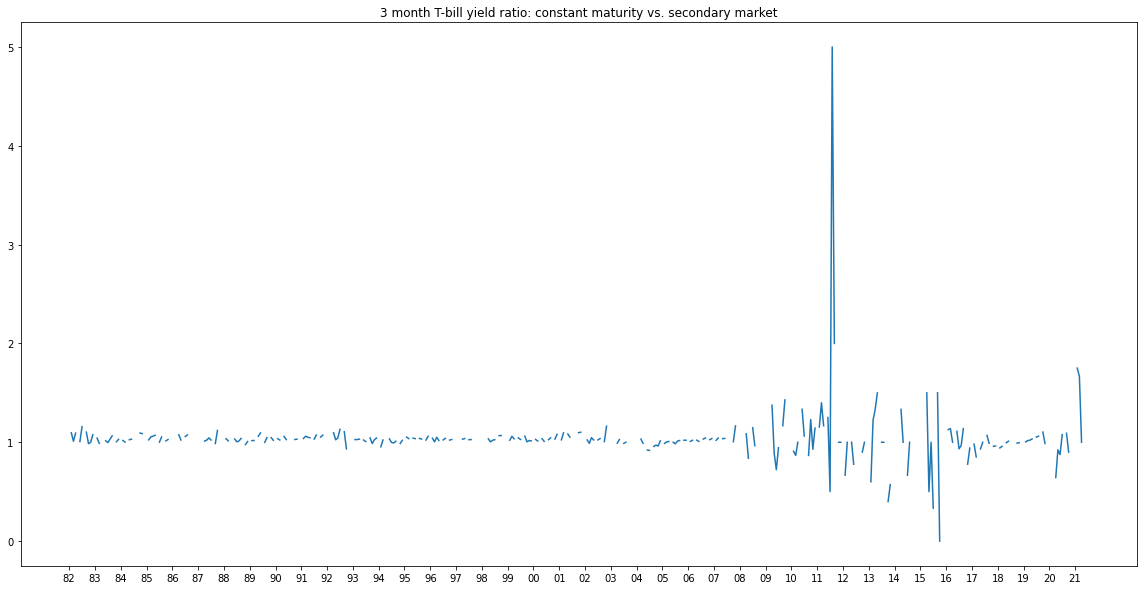

In [120]:
plt.figure(figsize=(20,10))
labels = [_[2:4] for _ in df['DATE'] if _[5:-3] == '01']
ticks = [k for k, v in enumerate(df['DATE']) if v[5:-3] == '01']
plt.xticks(ticks, labels)
plt.plot(df['ratio'])
plt.title('3 month T-bill yield ratio: constant maturity vs. secondary market')

In [122]:
df[df['DATE'] > '2011-03-01'].head(10)

,DATE,IRLTLT01USM156N,TB3MS,GS10,DGS3MO,ratio
351,2011-04-01,3.46,0.06,3.46,0.07,1.166667
352,2011-05-01,3.17,0.04,3.17,NaN,NaN
353,2011-06-01,3.00,0.04,3.00,0.05,1.250000
354,2011-07-01,3.00,0.04,3.00,0.02,0.500000
355,2011-08-01,2.30,0.02,2.30,0.10,5.000000
356,2011-09-01,1.98,0.01,1.98,0.02,2.000000
357,2011-10-01,2.15,0.02,2.15,NaN,NaN
358,2011-11-01,2.01,0.01,2.01,0.01,1.000000
359,2011-12-01,1.98,0.01,1.98,0.01,1.000000
360,2012-01-01,1.97,0.03,1.97,NaN,NaN


In [123]:
def 

,DATE,IRLTLT01USM156N,TB3MS,GS10,DGS3MO,ratio
0,1982-01-01,14.59,12.28,14.59,NaN,NaN
1,1982-02-01,14.43,13.48,14.43,14.77,1.095697
2,1982-03-01,13.86,12.68,13.86,12.81,1.010252
3,1982-04-01,13.87,12.70,13.87,13.87,1.092126
4,1982-05-01,13.62,12.09,13.62,NaN,NaN
...,...,...,...,...,...,...
469,2021-02-01,1.26,0.04,1.26,0.07,1.750000
470,2021-03-01,1.61,0.03,1.61,0.05,1.666667
471,2021-04-01,1.64,0.02,1.64,0.02,1.000000
472,2021-05-01,1.62,0.02,1.62,NaN,NaN
